In [1]:
pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=76ecf1127e1ba40e65c546703ba0cef0f948249e22adf4ce81a06b29803d3e32
  Stored in directory: c:\users\uzumakinagato\appdata\local\pip\cache\wheels\3f\e3\ec\8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2
Successfully built termcolor
  Attempting uninstall: google-auth
    Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9686 sha256=3625a92cf4b89ee603fa7054e933c968d228ca8428a248e3e2f7bf417ae91c3d
  Stored in directory: c:\users\uzumakinagato\appdata\local\pip\cache\wheels\a1\b6\7c\0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget



In [1]:
# Importing the libraries
import tensorflow as tf
import os
import time
import numpy as np
import matplotlib as plt
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [2]:
tf.__version__

'2.3.1'

In [3]:
# Locating our data
dataset_dir = "D:\\Koding\\Python\\Dicoding Machine Learning\\data\\"
training_dir = dataset_dir + "train\\"
testing_dir = dataset_dir + "validation\\"

In [4]:
# Designing the layers
CNN_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=1, activation='relu', input_shape=(512, 512, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])
opt = keras.optimizers.RMSprop(learning_rate=0.001)
CNN_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['acc'])

In [5]:
%%time
converter = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, validation_split=0.2)
data_train = converter.flow_from_directory(training_dir, target_size=(512,512), batch_size=1, class_mode='binary', subset='training')
data_val = converter.flow_from_directory(training_dir, target_size=(512,512), batch_size=32, class_mode='binary', subset='validation')

test_datagen = ImageDataGenerator(rescale = 1./255)
data_test = test_datagen.flow_from_directory(testing_dir, target_size = (512, 512), batch_size=16, class_mode = 'binary')

Found 556 images belonging to 2 classes.
Found 138 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Wall time: 322 ms


In [6]:
trained_model = CNN_model.fit(data_train, epochs=5, verbose=True, steps_per_epoch=15, validation_data = data_val)

Epoch 1/5
15/15 [==============================] - 17s 1s/step - loss: 3.9037 - acc: 0.4667 - val_loss: 0.6891 - val_acc: 0.5000
Epoch 2/5
15/15 [==============================] - 15s 1s/step - loss: 0.8038 - acc: 0.5333 - val_loss: 0.6694 - val_acc: 0.5072
Epoch 3/5
15/15 [==============================] - 15s 998ms/step - loss: 0.7408 - acc: 0.6000 - val_loss: 0.6305 - val_acc: 0.6522
Epoch 4/5
15/15 [==============================] - 15s 1s/step - loss: 1.0839 - acc: 0.4667 - val_loss: 0.6832 - val_acc: 0.6377
Epoch 5/5
15/15 [==============================] - 15s 1s/step - loss: 0.7066 - acc: 0.4667 - val_loss: 0.6924 - val_acc: 0.5000


Mean_Train_Accuracy:  0.5066666781902314
Max_Train_Accuracy:  0.6000000238418579
Mean_Validation_Accuracy:  0.5594202995300293
Max_Validation_Accuracy:  0.6521739363670349


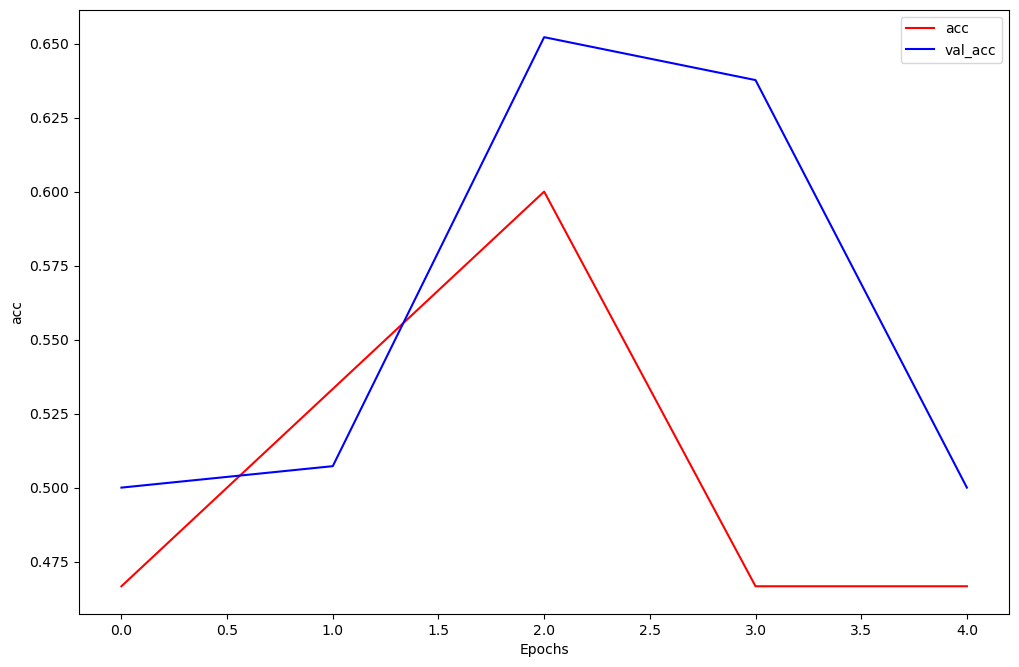

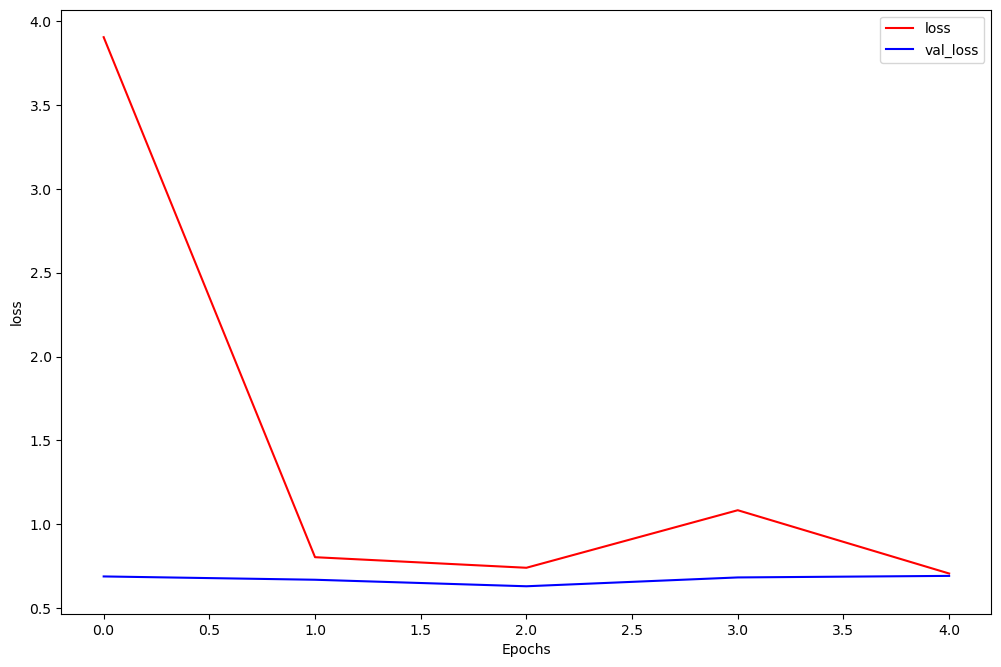

In [10]:
print("Mean_Train_Accuracy: ",np.mean(trained_model.history['acc']))
print("Max_Train_Accuracy: ",np.max(trained_model.history['acc']))

print("Mean_Validation_Accuracy: ",np.mean(trained_model.history['val_acc']))
print("Max_Validation_Accuracy: ",np.max(trained_model.history['val_acc']))

import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.subplots(figsize=(12,8), dpi=100)
    plt.plot(history.history[string],'r')
    plt.plot(history.history['val_' + string], 'b')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_' + string])
    plt.show()

plot_graphs(trained_model, "acc")
plot_graphs(trained_model, "loss")

Accuracy:  34 %
Wall time: 9.4 s


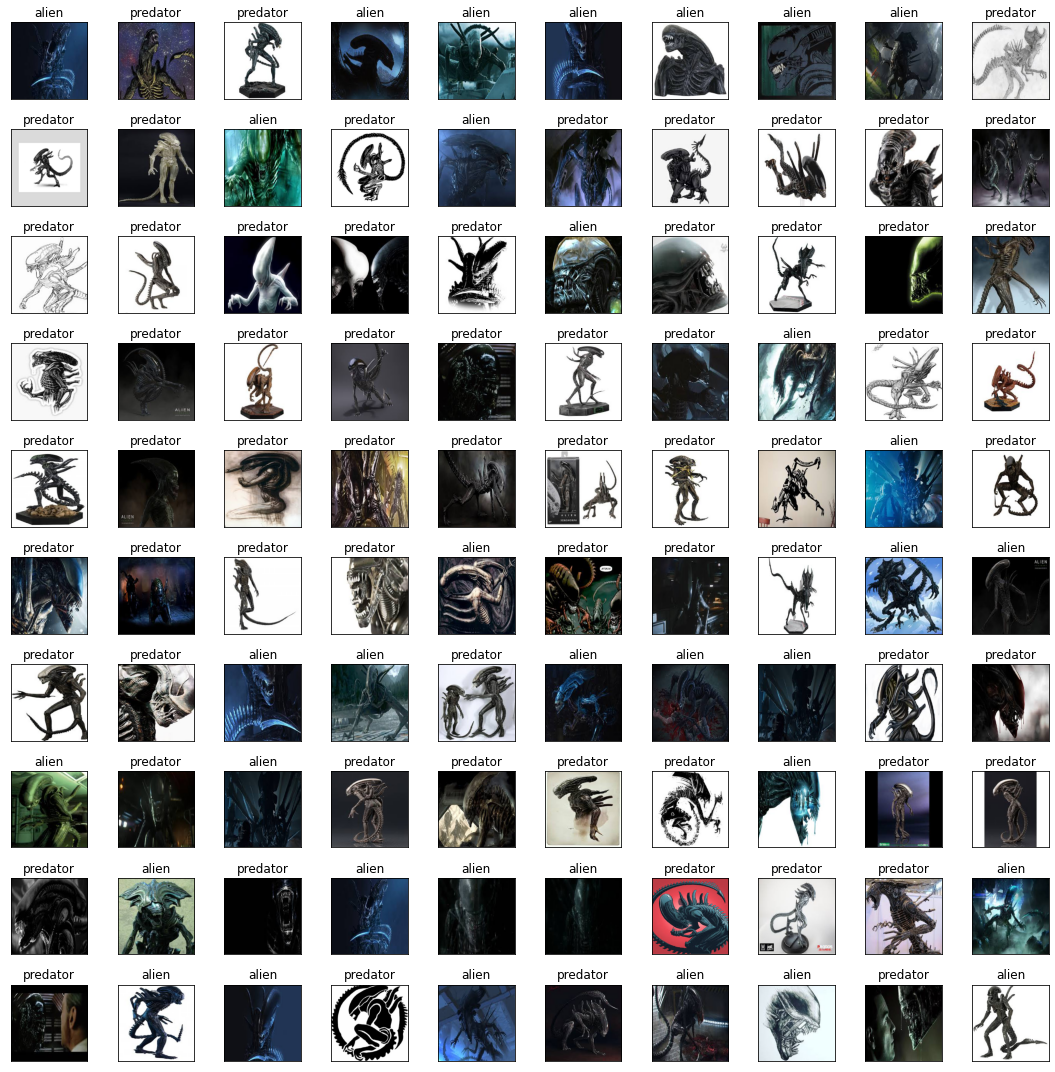

In [12]:
%%time

# plot ALIEN validation result

image_path = "D:\\Koding\\Python\\Dicoding Machine Learning\\data\\validation\\alien\\"
name_file = os.listdir(image_path)

count = 0
plt.figure(figsize=(15,15))
for i in range(100):
    img = image.load_img(image_path+name_file[i], target_size=(512, 512))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = CNN_model.predict(images, batch_size=10)
    if classes[0] > 0.5:
        class_res = "predator"
    else:
        class_res = "alien"
        count += 1
        
    plt.subplot(10,10,i+1)
    plt.imshow(img)
    plt.title(class_res)
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()
print("Accuracy: ",count,"%")

Accuracy:  70 %
Wall time: 9.57 s


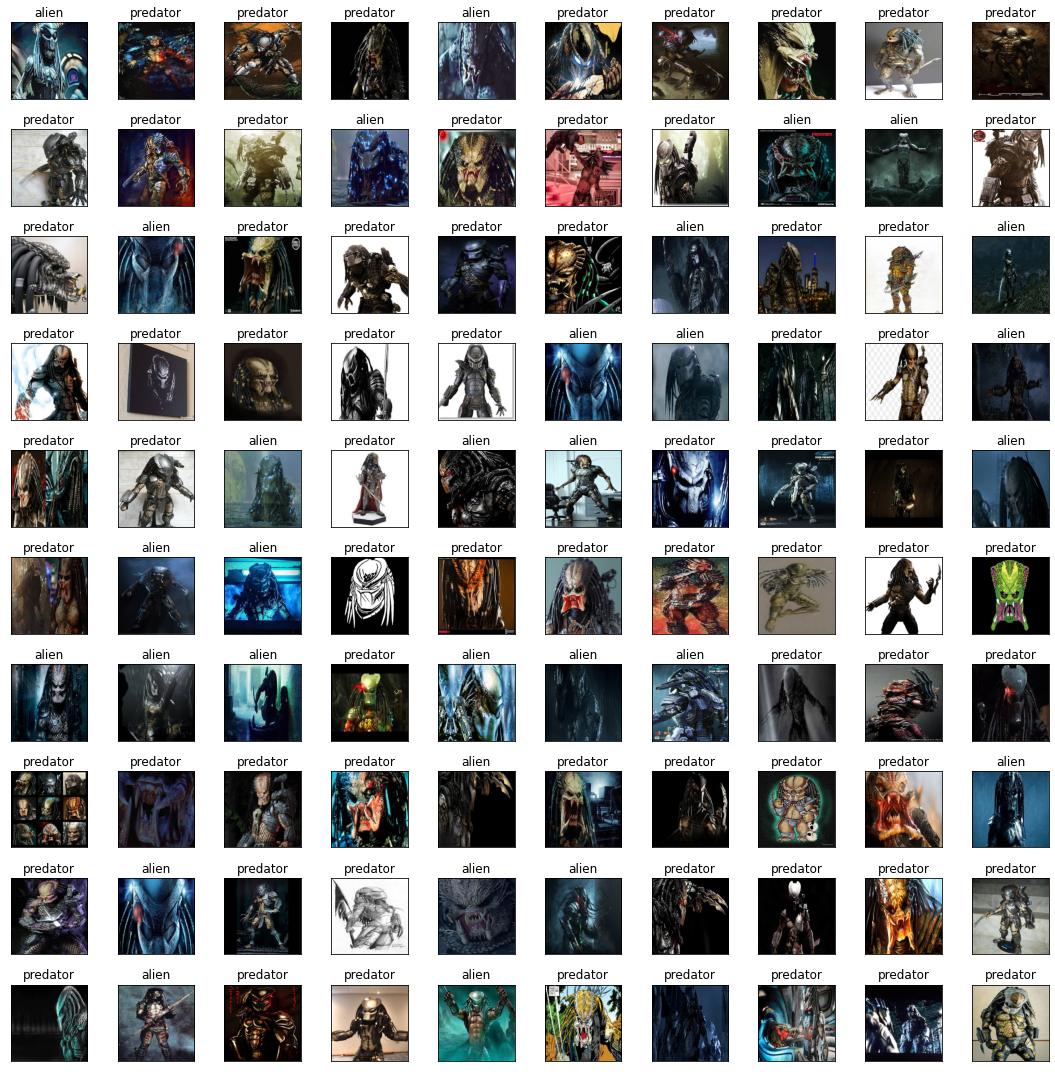

In [13]:
%%time

# plot PREDATOR validation result

count = 0
plt.figure(figsize=(15,15))
for i in range(100):
    image_path = "D:\\Koding\\Python\\Dicoding Machine Learning\\data\\validation\\predator\\"+str(i)+".jpg"
    img = image.load_img(image_path, target_size=(512, 512))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = CNN_model.predict(images, batch_size=10)
    if classes[0] > 0.5:
        class_res = "predator"
        count += 1
    else:
        class_res = "alien"   
        
    plt.subplot(10,10,i+1)
    plt.imshow(img)
    plt.title(class_res)
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()
print("Accuracy: ",count,"%")